# Урок 8. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
### YOUR CODE HERE ###
data = load_wine()
data = pd.DataFrame(data.data, columns=data.feature_names)
data['target'] = load_wine().target
data['target'] = data['target'].astype('int')

X = data.drop('target', axis=1)
y = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [3]:
from sklearn import tree
import graphviz

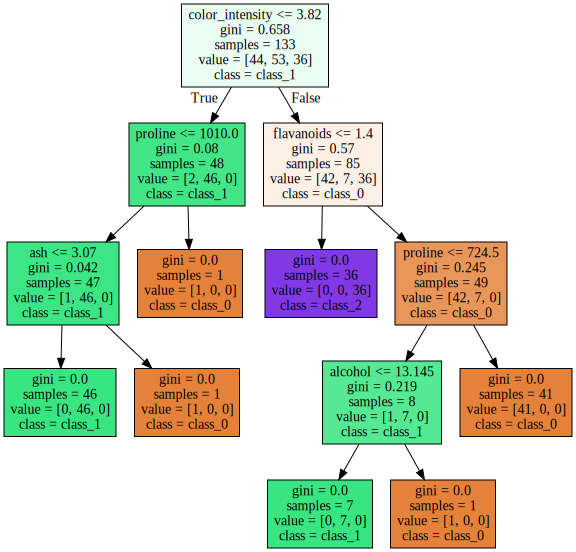

In [4]:
def print_graph(clf, X):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=X.columns,  
                                    class_names=load_wine().target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(clf, X)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [5]:
### YOUR CODE HERE ###
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9555555555555556

Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [6]:
### YOUR CODE HERE ###
clf = DecisionTreeClassifier(max_features=2, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8222222222222222

### 5.
Теперь постройте граф дерева решений, используя graphviz.

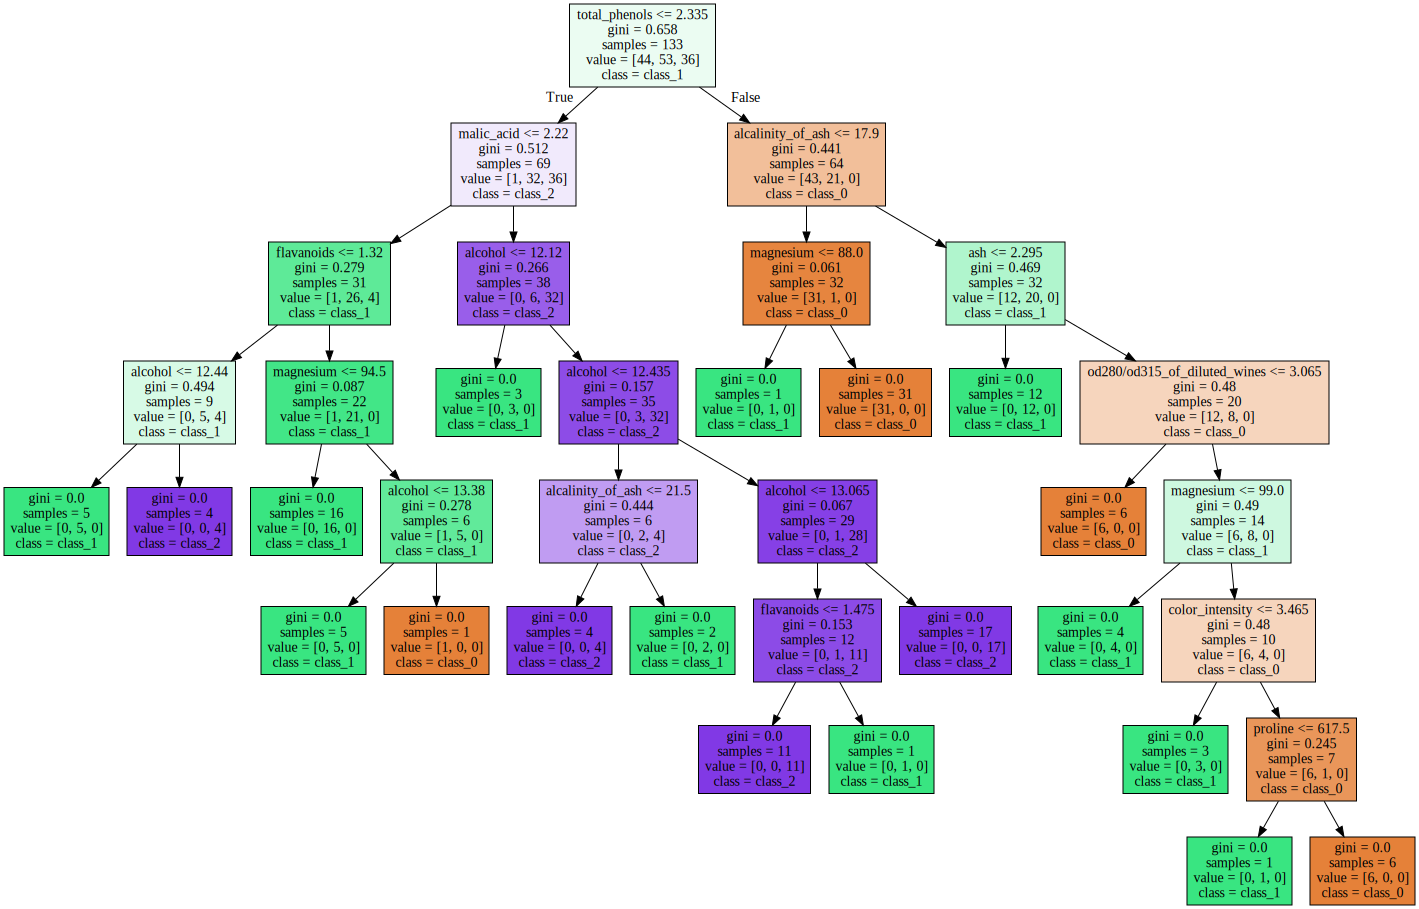

In [7]:
def print_graph(clf, X):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=X.columns,  
                                    class_names=load_wine().target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(clf, X)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [13]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

dtc = DecisionTreeClassifier()

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [14]:
### YOUR CODE HERE ###
tree_grid = GridSearchCV(dtc, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

{'max_depth': 3, 'max_features': 8}

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

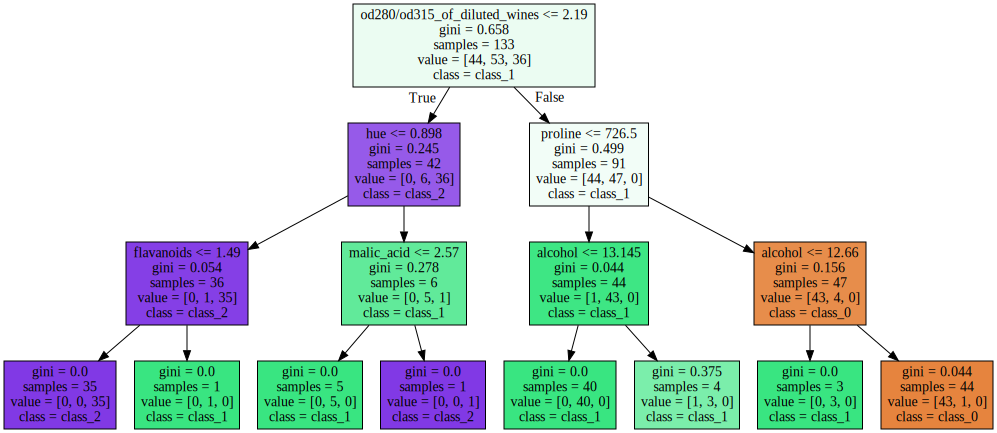

In [16]:
### YOUR CODE HERE ###
best = tree_grid.best_params_
clf = DecisionTreeClassifier(max_depth=best['max_depth'], max_features=best['max_features'],
                             random_state=42).fit(X_train, y_train)
def print_graph(clf, X):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=X.columns,  
                                    class_names=load_wine().target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(clf, X)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность равна {accuracy}')

Точность равна 0.9111111111111111
